In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
#from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

import gower


In [55]:
df = pd.read_csv("../datasets/TON_IoT-Datasets/Train_Test_datasets/Train_Test_Network_dataset/Train_Test_Network.csv")
df.pop('type')
df.head()

#reduced_df = df[["src_port", "proto", "service", "dst_port", "duration", "label"]]

    #'proto', 'service', 'conn_state', 'dns_query', 'ssl_version',
    # 'ssl_cipher', 'ssl_subject', 'ssl_issuer', 'http_method', 'http_uri',
    # 'http_version', 'http_orig_mime_types', 'http_resp_mime_types',
    # 'weird_name', 'weird_addl']]
#df = reduced_df

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,...,0,0,0,-,-,-,bad_TCP_checksum,-,F,0
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,...,0,0,0,-,-,-,-,-,-,0
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,...,0,0,0,-,-,-,bad_TCP_checksum,-,F,0
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,0,-,-,-,-,-,-,0
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,...,0,0,0,-,-,-,bad_UDP_checksum,-,F,0


In [56]:

# transformer = make_column_transformer(
#     (OneHotEncoder(), ['proto', 'service']),
#     # 'ssl_cipher', 'ssl_subject', 'ssl_issuer', 'http_method', 'http_uri',
#     # 'http_version', 'http_orig_mime_types', 'http_resp_mime_types',
#     # 'weird_name', 'weird_addl']),
#     remainder='passthrough')
# 
# transformed = transformer.fit_transform(df)
# transformed_df = pd.DataFrame(
#     transformed, 
#     columns=transformer.get_feature_names_out()
# )

In [57]:
# df = transformed_df
# transformed_df.shape

In [58]:
# Percentage malware
perc = len(df.loc[df['label']==1])/len(df)
print(perc)

0.34930147513355586


In [59]:
# Balance dataset
num_anom = len(df.loc[df['label']==1.])
df_anom = df.loc[df['label']==1.]
df_normal = df.loc[df['label']==0.]
df_normal = df_normal.sample(num_anom, replace=False)
df_concated = pd.concat([df_normal, df_anom])
balanced_data = df_concated

In [60]:
data = balanced_data.sample(4500, random_state=21)

#train_data = data.sample(3000, random_state=21)
#test_data = data.sample(1500, random_state=18)

#train_data = data[0:3000]
#test_data = data[3000:6000]

labels = data.pop('label')
train_labels = np.array(labels[0:1000])
test_labels = np.array(labels[1000:4500])

In [61]:
gower_mat = gower.gower_matrix(data)
train_gower_mat = gower_mat[0:1000,0:1000]
test_gower_mat = gower_mat[1000:4500,0:3000]

In [62]:
print(train_gower_mat.shape)

(1000, 1000)


In [63]:
print(test_gower_mat.shape)

(3500, 3000)


In [10]:
# Unbalanced dataset

# unbalanced_data = df.copy()
# data = unbalanced_data.sample(6000, random_state=21)
# train_data = data[0:3000]
# test_data = data[3000:6000]
# train_data.pop('type')
# test_data.pop('type')
# train_labels = train_data.pop('label')
# test_labels = test_data.pop('label')
# 
# train_gower_mat = gower.gower_dist.gower_matrix(train_data)
# test_gower_mat = gower.gower_dist.gower_matrix(test_data)

In [11]:
# data_scaled = data.copy()
# min_max_scaler = MinMaxScaler()
# #data_scaled[["src_port", "dst_port", "src_bytes", "dst_bytes", "missed_bytes"]] = min_max_scaler.fit_transform(data_scaled[["src_port", "dst_port", "src_bytes", "dst_bytes", "missed_bytes"]])
# data_scaled[data_scaled.columns] = min_max_scaler.fit_transform(data_scaled[data_scaled.columns])
# print(data_scaled.shape)

In [12]:
# train_data, test_data, train_labels, test_labels = train_test_split(train_gower_mat, unbalanced_labels, test_size=0.33, random_state=21)

In [13]:
# Separe normal and anomaly classes

#train_labels = train_labels.astype(bool)
#test_labels = test_labels.astype(bool)

# normal_train_data = train_data[~train_labels]
# normal_test_data = test_data[~test_labels]
# 
# anomalous_train_data = train_data[train_labels]
# anomalous_test_data = test_data[test_labels]

In [16]:
# print(normal_train_data[0])

In [17]:
# plt.plot(normal_train_data[0])
# #plt.plot(normal_train_data[1])
# #plt.plot(normal_train_data[2])
# plt.title("Normal Data")
# plt.show()

In [18]:
# plt.plot(anomalous_train_data[0])
# #plt.plot(anomalous_train_data[1])
# #plt.plot(anomalous_train_data[2])
# plt.title("Anomaly Data")
# plt.show()

In [19]:
# train_data = np.array(train_data)
# normal_train_data = np.array(normal_train_data)
# normal_test_data = np.array(normal_test_data)
# anomalous_train_data = np.array(anomalous_train_data)
# anomalous_test_data = np.array(anomalous_test_data)

In [20]:
# class AutoEncoder(Model):
#   def __init__(self):
#     super(AutoEncoder, self).__init__()
#     self.encoder = tf.keras.Sequential([
#                   tf.keras.layers.Dense(64, activation="relu"),
#                   tf.keras.layers.Dense(32, activation="relu"),
#                   tf.keras.layers.Dense(16, activation="relu"),
#                   tf.keras.layers.Dense(8, activation="relu")
#               ])
#     self.decoder = tf.keras.Sequential([
#                   tf.keras.layers.Dense(16, activation="relu"),
#                   tf.keras.layers.Dense(32, activation="relu"),
#                   tf.keras.layers.Dense(64, activation="relu"),
#                   tf.keras.layers.Dense(16, activation="sigmoid")
#               ])
#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

In [44]:
def create_keras_model():
  return tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(3000,)),
      tf.keras.layers.Dense(1024, activation="relu"),
      tf.keras.layers.Dense(512, activation="relu"),
      tf.keras.layers.Dense(256, activation="relu"),
      #tf.keras.layers.Dense(256, activation="relu"),
      #tf.keras.layers.Dense(256, activation="relu"),
      #tf.keras.layers.Dense(256, activation="relu"),
      #tf.keras.layers.Dense(256, activation="relu"),
      #tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dense(2),
      #tf.keras.layers.Dense(2, activation="relu"),
      #tf.keras.layers.Dense(32, activation="relu"),
      #tf.keras.layers.Dense(4, activation="relu"),
      #tf.keras.layers.Dense(1, activation="sigmoid"),
      tf.keras.layers.Softmax()
  ])

In [45]:
train_data = train_gower_mat

In [46]:
model = create_keras_model()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, mode="min")
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
loss = [tf.keras.losses.SparseCategoricalCrossentropy()]
model.compile(optimizer=opt, loss=loss, metrics = metrics)

In [47]:
history = model.fit(train_data, train_labels, epochs=300, batch_size=16,
                    validation_data=(train_data, train_labels),
                    shuffle=True,
                    callbacks=[early_stopping]
                    )

Epoch 1/300
188/188 [==============================] - 3s 14ms/step - loss: 0.3838 - sparse_categorical_accuracy: 0.8683 - val_loss: 0.2288 - val_sparse_categorical_accuracy: 0.8947
Epoch 2/300
188/188 [==============================] - 2s 13ms/step - loss: 0.2281 - sparse_categorical_accuracy: 0.9153 - val_loss: 0.1746 - val_sparse_categorical_accuracy: 0.9537
Epoch 3/300
188/188 [==============================] - 2s 13ms/step - loss: 0.1748 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.1687 - val_sparse_categorical_accuracy: 0.9543
Epoch 4/300
188/188 [==============================] - 2s 12ms/step - loss: 0.1541 - sparse_categorical_accuracy: 0.9443 - val_loss: 0.1279 - val_sparse_categorical_accuracy: 0.9557
Epoch 5/300
188/188 [==============================] - 2s 13ms/step - loss: 0.1245 - sparse_categorical_accuracy: 0.9503 - val_loss: 0.1243 - val_sparse_categorical_accuracy: 0.9553
Epoch 6/300
188/188 [==============================] - 2s 13ms/step - loss: 0.1097 - spars

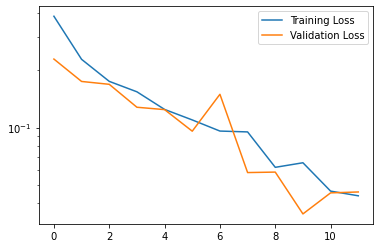

In [48]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.yscale('log')
plt.legend()

In [49]:
results = model.evaluate(test_gower_mat, test_labels)
print("test loss, test acc:", results)

47/47 [==============================] - 0s 3ms/step - loss: 0.0473 - sparse_categorical_accuracy: 0.9913
test loss, test acc: [0.047336775809526443, 0.9913333058357239]


In [50]:
def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions))) #sensitivity
  print("F1 = {}".format(f1_score(labels, predictions)))
  print("ROC_AUC = {}".format(roc_auc_score(labels, predictions)))

In [51]:
len(test_gower_mat[0])

3000

In [52]:
# Results dont make sense give more weight to anomaly class in the learning process
preds = model.predict(test_gower_mat)
#y_classes = preds.argmax(axis=-1)
#print_stats(preds, test_labels)

In [53]:
print_stats(np.round(preds[:,1], decimals=0), test_labels.astype(int))

Accuracy = 0.9913333333333333
Precision = 1.0
Recall = 0.9828042328042328
F1 = 0.9913275517011341
ROC_AUC = 0.9914021164021164
